In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from scipy.interpolate import make_interp_spline
from dotenv import load_dotenv
from sklearn.preprocessing import MinMaxScaler

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore", message="Workbook contains no default style, apply openpyxl's default")

# 환경 변수 로드
load_dotenv()
file_path_traffic_2023 = os.getenv('FiLE_PATH_traffic_2023')
file_path_traffic_2022 = os.getenv('FiLE_PATH_traffic_2022')
file_path_traffic_2021 = os.getenv("FiLE_PATH_traffic_2021")
file_path_traffic_2020 = os.getenv('FiLE_PATH_traffic_2020')
file_image_traffic = os.getenv('File_image_traffic_Car')

# 파일 읽기
df_traffic_2023 = pd.read_excel(file_path_traffic_2023, engine='openpyxl')
df_traffic_2022 = pd.read_excel(file_path_traffic_2022, engine='openpyxl')
df_traffic_2021 = pd.read_excel(file_path_traffic_2021, engine='openpyxl')
df_traffic_2020 = pd.read_excel(file_path_traffic_2020, engine='openpyxl')




In [3]:

# 2번째 열부터 끝까지의 DataFrame 추출 (각 데이터셋)
df_subset1 = df_traffic_2023.iloc[:, [1, 7]]
df_subset2 = df_traffic_2022.iloc[:, [1, 7]]
df_subset3 = df_traffic_2021.iloc[:, [1, 7]]
df_subset4 = df_traffic_2020.iloc[:, [1, 6]]

# 각 DataFrame의 전체 합 계산 (모든 행과 모든 열의 합산)
total_2023 = df_subset1.sum().sum()
total_2022 = df_subset2.sum().sum()
total_2021 = df_subset3.sum().sum()
total_2020 = df_subset4.sum().sum()


year_data = {
    '2020': total_2020,
    '2021': total_2021,
    '2022': total_2022,
    '2023': total_2023
}

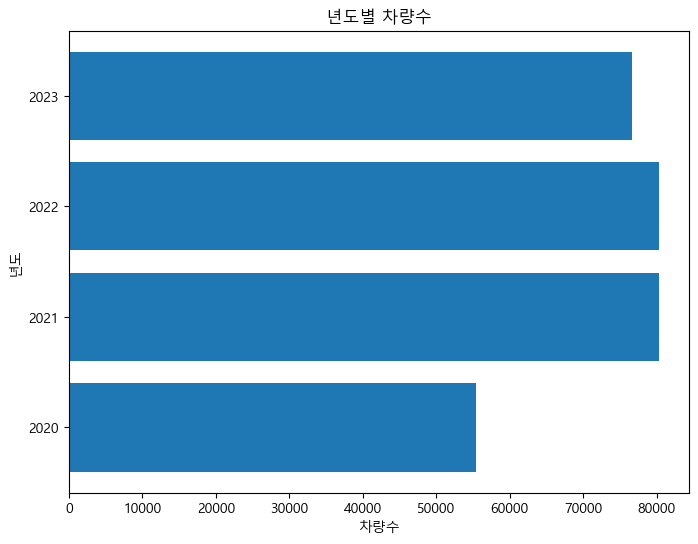

In [4]:
# 딕셔너리를 데이터프레임으로 변환 (시각화를 위한 정리)
df_year = pd.DataFrame(list(year_data.items()), columns=['년도', '차량수'])

# 한글 폰트 설정 (환경에 따라 폰트 설정 필요)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 가로 막대 그래프 그리기
plt.figure(figsize=(8,6))
plt.barh(df_year['년도'], df_year['차량수'])
plt.xlabel("차량수")
plt.ylabel("년도")
plt.title("년도별 차량수")
# plt.show()

plt.savefig(file_image_traffic, format="png", dpi=300)